In [1]:
import pandas as pd
Xy_train_csv=pd.read_csv('train.csv')
Xy_test_csv=pd.read_csv('test.csv')

labels = ["WALKING","WALKING UPSTAIRS",'WALKING DOWNSTAIRS','SITTING','STANDING','LAYING']

In [2]:
Xy_train_csv = Xy_train_csv.drop('Unnamed: 0', 1)
Xy_test_csv = Xy_test_csv.drop('Unnamed: 0', 1)

In [3]:
Xy_train_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,y
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [4]:
print(Xy_train_csv.shape)

(7352, 562)


In [5]:
Xy_test_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,y
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [6]:
print(Xy_test_csv.shape)

(2947, 562)


In [7]:
#Xy_train_csv.loc[Xy_train_csv['y'] == 5]

In [8]:
X_train=Xy_train_csv.iloc[:,0:561]
y_train=Xy_train_csv.iloc[:,561:562]
X_test=Xy_test_csv.iloc[:,0:561]
y_test=Xy_test_csv.iloc[:,561:562]




In [9]:
#s = y_train.iloc[:,0]
#y_train=pd.DataFrame()
#y_train=pd.get_dummies(s)

In [10]:
#y_train

# Dimensionality Reduction

In [11]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train.T)
print(pca.explained_variance_ratio_) 

[ 0.72417962  0.13858013]


In [12]:
print(pca.singular_values_)  

[ 878.24727073  384.18831044]


In [13]:
reduced_data=pd.DataFrame(pca.components_).T

In [14]:
reduced_data.head()

,0,1
0,0.013991,-0.009954
1,0.013254,-0.009066
2,0.013251,-0.008652
3,0.012955,-0.009369
4,0.013151,-0.009651


In [15]:
X_train_WALKING=X_train.loc[Xy_train_csv['y'] == 1]
X_train_WALKING_UPSTAIRS=X_train.loc[Xy_train_csv['y'] == 2]
X_train_WALKING_DOWNSTAIRS=X_train.loc[Xy_train_csv['y'] == 3]
X_train_SITTING=X_train.loc[Xy_train_csv['y'] == 4]
X_train_STANDING=X_train.loc[Xy_train_csv['y'] == 5]
X_train_LAYING=X_train.loc[Xy_train_csv['y'] == 6]

print("WALKING           ",X_train_WALKING.shape)
print("WALKING_UPSTAIRS  ",X_train_WALKING_UPSTAIRS.shape)
print("WALKING_DOWNSTAIRS",X_train_WALKING_DOWNSTAIRS.shape)
print("SITTING           ",X_train_SITTING.shape)
print("STANDING          ",X_train_STANDING.shape)
print("LAYING            ",X_train_LAYING.shape)


WALKING            (1226, 561)
WALKING_UPSTAIRS   (1073, 561)
WALKING_DOWNSTAIRS (986, 561)
SITTING            (1286, 561)
STANDING           (1374, 561)
LAYING             (1407, 561)


In [16]:
# X_train_WALKING=reduced_data.loc[Xy_train_csv['y'] == 1]
# X_train_WALKING_UPSTAIRS=reduced_data.loc[Xy_train_csv['y'] == 2]
# X_train_WALKING_DOWNSTAIRS=reduced_data.loc[Xy_train_csv['y'] == 3]
# X_train_SITTING=reduced_data.loc[Xy_train_csv['y'] == 4]
# X_train_STANDING=reduced_data.loc[Xy_train_csv['y'] == 5]
# X_train_LAYING=reduced_data.loc[Xy_train_csv['y'] == 6]

filtered_data = []
#filtered_data=pd.DataFrame()
for i in range(0,6):
    #filtered_data[i]=reduced_data.loc[Xy_train_csv['y'] == i+1]
    filtered_data.append(reduced_data.loc[Xy_train_csv['y'] == i+1])

print(X_train_WALKING.shape)
print(X_train_WALKING_UPSTAIRS.shape)


(1226, 561)
(1073, 561)


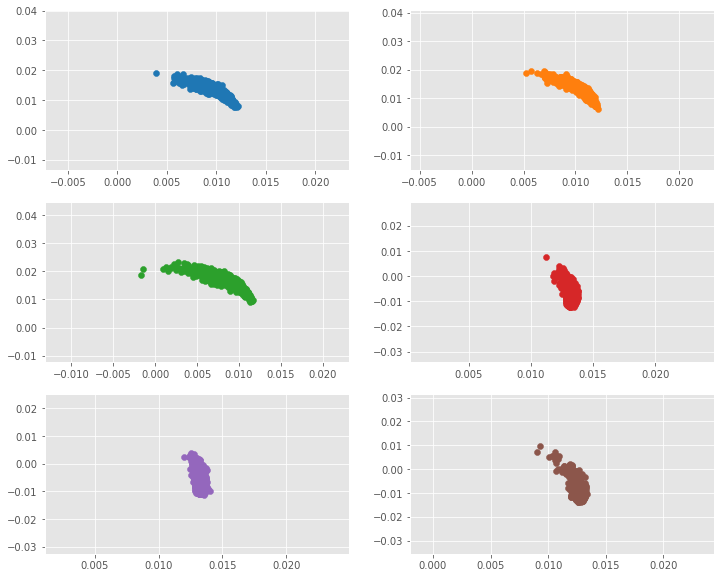

In [17]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

colors= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
plt.figure(figsize=(12,10))


for i in range(0,6):
    plt.subplot(3,2,i+1)
    plt.scatter(filtered_data[i][0],filtered_data[i][1], color=colors[i],label=labels[i])
    #plt.lagend
plt.show()

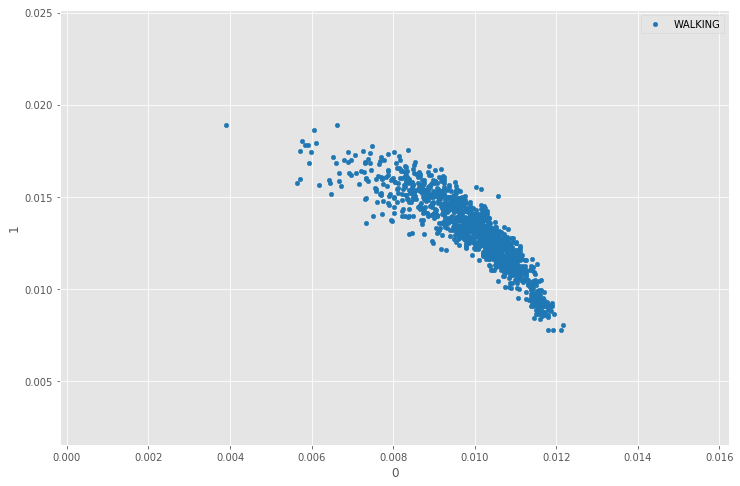

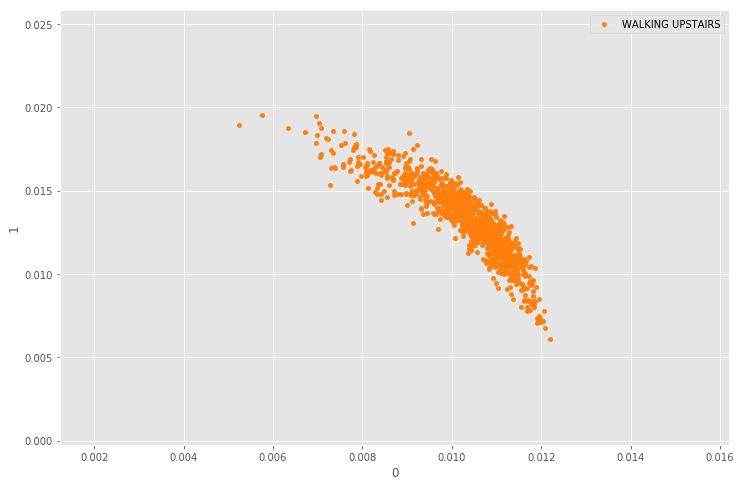

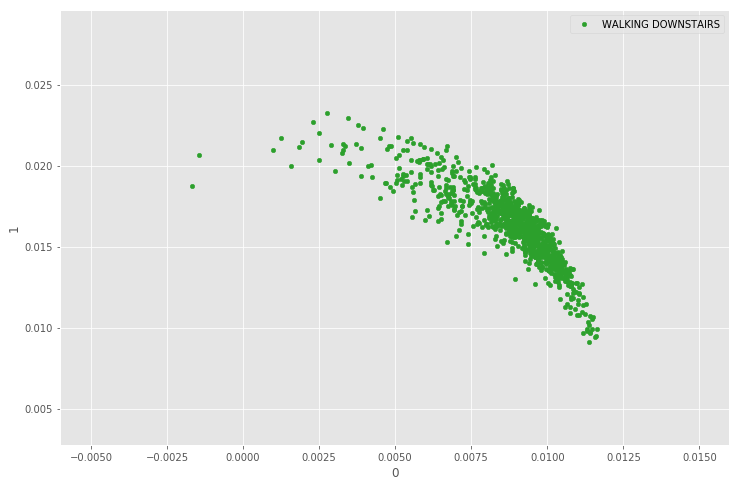

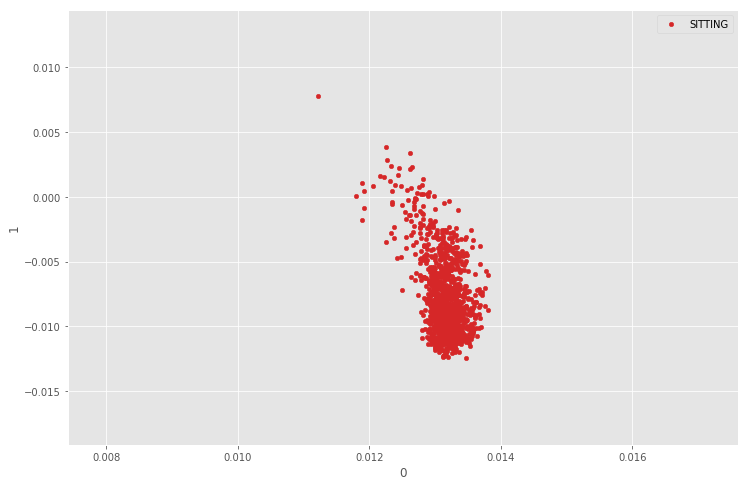

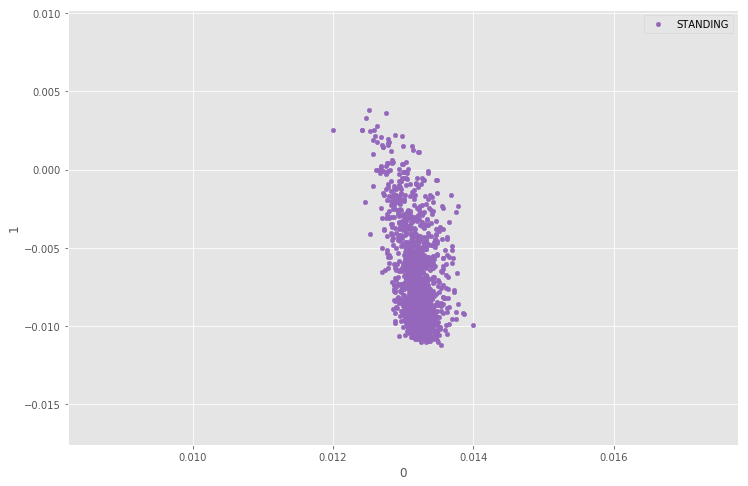

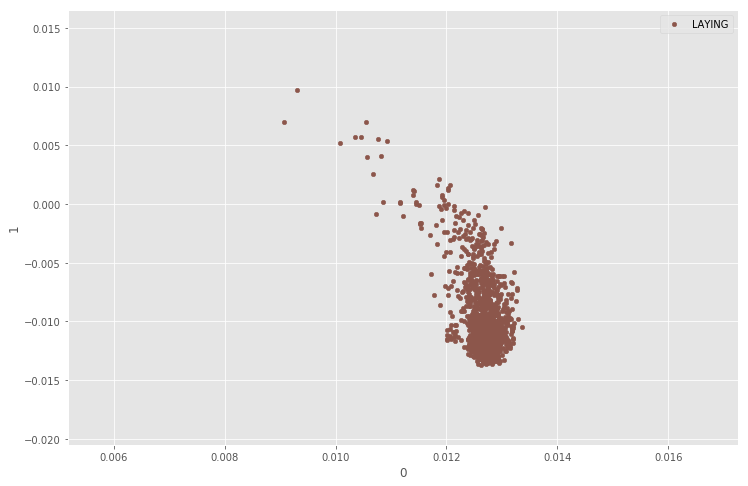

In [18]:

for i in range(0,6):
    #plt.scatter(filtered_data[i][0],filtered_data[i][1], color=colors[i])
    #plt.xlabel(labels[i])
    #plt.show()
    pd.DataFrame(filtered_data[i]).plot.scatter(x=0, y=1, color=colors[i], label=labels[i], figsize=(12, 8)); 
    
plt.show()


In [19]:
# plt.figure(figsize=(15,10))
# for i in range(0,6):
#     plt.scatter(filtered_data[i][0],filtered_data[i][1], color=colors[i],label=labels[i])
#     plt.legend(loc='upper left')
# plt.show()

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
#y_train

In [22]:
#y_test

In [23]:
accuracy_df=pd.read_csv('Accuracy.csv')
accuracy_df.columns = ['a', 'b']
#print(accuracy_df)

#model = LogisticRegression()
# accuracy_df=pd.DataFrame()
# for i in range(3,562):
#     X_train=Xy_train_csv.iloc[:,0:i]
#     y_train=Xy_train_csv.iloc[:,561:562]
#     X_test=Xy_test_csv.iloc[:,0:i]
#     y_test=Xy_test_csv.iloc[:,561:562]
#     model = model.fit(X_train, y_train.values.ravel())
#     accu=model.score(X_test, y_test)
#     accuracy_df[i]=[accu]
#     #accuracy_df['accuracy']=accu
#     #accuracy_df['features']=i
#     print("Accuracy for ",i," : ",accu)
#     #plt.line(i,accu)
#     #plt.show()
#     #if(i%10==0):
#     #    print(accuracy_df)
#     #accuracy_df.plot(x='features', y='accuracy')

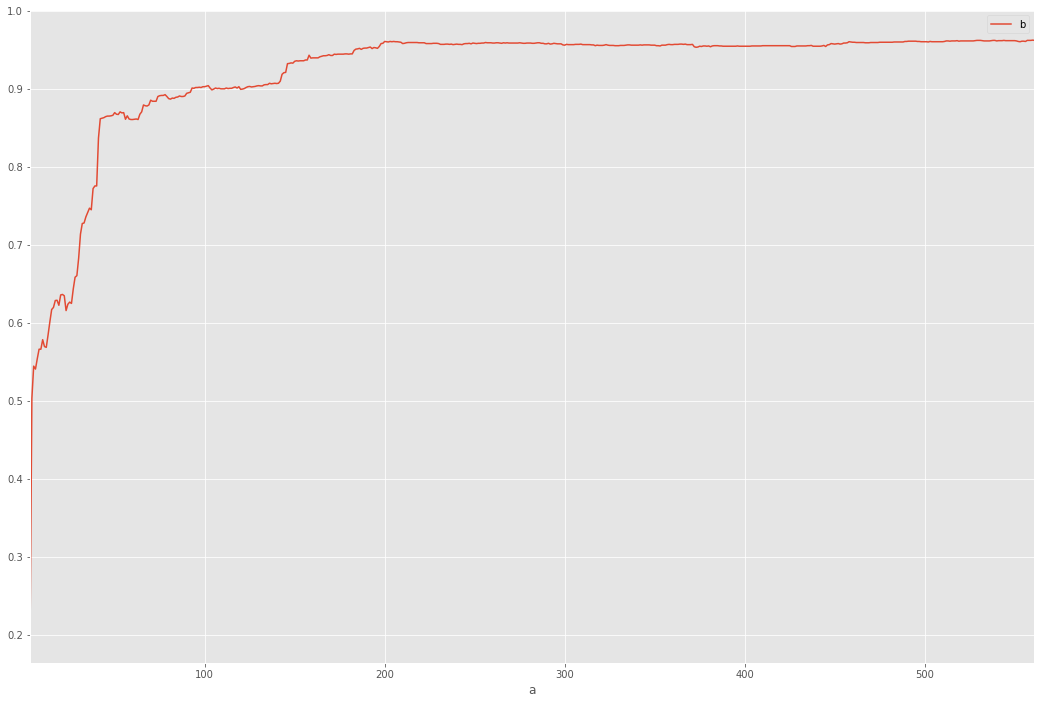

In [24]:
%matplotlib inline
accuracy_df.plot(x='a', y='b', figsize=(18, 12))
#accuracy_df.T.to_csv('Accuracy.csv')

In [25]:
model = LogisticRegression()
print("Training input ",X_train.shape,"\nTraining label ",y_train.shape)
model = model.fit(X_train, y_train.values.ravel())


Training input  (7352, 561) 
Training label  (7352, 1)


In [26]:
# check the accuracy on the training set
print("Test input ",X_test.shape,"\nTest label ",y_test.values.ravel().shape)
print("Accuracy: ",model.score(X_test, y_test))
#model.score(X_train, y_train)

Test input  (2947, 561) 
Test label  (2947,)
Accuracy:  0.961995249406


In [27]:
model.predict_proba(X_test)

array([[  1.25698592e-06,   1.69675556e-05,   1.91755458e-03,
          6.91369677e-04,   9.96968670e-01,   4.04181666e-04],
       [  9.28103630e-07,   4.20481316e-07,   1.61292028e-06,
          7.23677174e-02,   9.27517079e-01,   1.12242096e-04],
       [  1.55516669e-06,   3.85034061e-09,   1.05513036e-05,
          6.10719150e-02,   9.38825243e-01,   9.07316439e-05],
       ..., 
       [  4.69156775e-03,   9.93540280e-01,   1.51219864e-03,
          1.26533924e-04,   1.07470524e-04,   2.19492626e-05],
       [  8.19226954e-03,   9.89635785e-01,   1.42597658e-03,
          7.15537940e-04,   1.28886815e-05,   1.75425851e-05],
       [  9.31817143e-02,   9.03857694e-01,   2.44116116e-03,
          2.47121059e-04,   2.30051950e-04,   4.22575838e-05]])

In [28]:
# predict class labels for the test set
predicted = model.predict(X_test)

In [29]:
predicted

array([5, 5, 5, ..., 2, 2, 2])

In [30]:
result_comparison=pd.DataFrame()
result_comparison['Y']=y_test
result_comparison['Y`']=predicted


In [31]:
#%matplotlib inline
#result_comparison['Y`'].plot(kind="bar")
result_comparison

,Y,Y`
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


                    precision    recall  f1-score   support

           WALKING       0.94      1.00      0.97       496
  WALKING UPSTAIRS       0.97      0.95      0.96       471
WALKING DOWNSTAIRS       1.00      0.97      0.98       420
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
            LAYING       1.00      1.00      1.00       537

       avg / total       0.96      0.96      0.96      2947



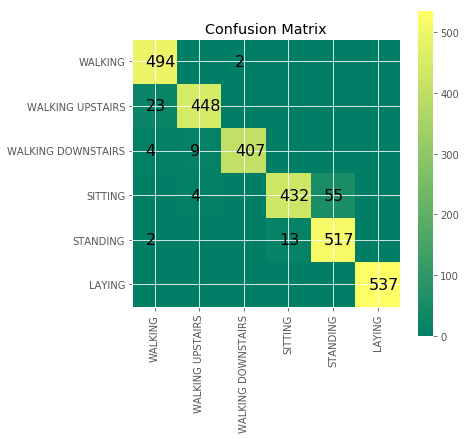

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}
print (classification_report(y_test, predicted,
                            target_names=[l for l in labels.values()]))

conf_mat = confusion_matrix(y_test, predicted)

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
plt.xticks(range(6), [l for l in labels.values()], rotation=90)
plt.yticks(range(6), [l for l in labels.values()])
plt.show()

# SVM > SVC

In [33]:
from sklearn.svm import SVC
clf = SVC(C=1., gamma=0.1, kernel='rbf', random_state=0)
clf.fit(X_train, y_train.values.ravel()) 
#print(clf.predict([[-0.8, -1]]))
print(clf.score(X_test, y_test))

0.95486935867


In [34]:
# clf = SVC()
# accuracy_df2=pd.DataFrame()
# for i in range(3,562):
#     X_train=Xy_train_csv.iloc[:,0:i]
#     y_train=Xy_train_csv.iloc[:,561:562]
#     X_test=Xy_test_csv.iloc[:,0:i]
#     y_test=Xy_test_csv.iloc[:,561:562]
#     clf.fit(X_train, y_train.values.ravel())
#     accu=clf.score(X_test, y_test)
#     accuracy_df2[i]=[accu]
#     print("Accuracy for ",i," : ",accu)

In [39]:
from sklearn_porter import Porter

porter = Porter(clf, language='java')
output = porter.export()
#print(output)

In [40]:
#accuracy_df2.T.to_csv('Accuracy2.csv')
#%matplotlib inline
#accuracy_df2.T.plot( y=0, figsize=(18, 12))

In [41]:
text_file = open("JavaCode2.java", "w")
text_file.write(output)
text_file.close()